### Exploratory Data Analysis


- This file consists EDA on all women data file. It analyse all features of the data exploring their individual properties and interrelationships. 
- Additionally, it will examine the rewards distribution for each action (Annual Mammogram & Biopsy) of the RL agent used in the project

In [1]:
# Import required packages to perform EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Load the all_women_data CSV file

cwd_path = str(Path.cwd())

# file path
file_path = cwd_path + "/dataset/all_women_data.csv"
all_women_data = pd.read_csv(file_path) # read the file

In [3]:
# Set the style and color palette
sns.set(style = "whitegrid")
colors = sns.color_palette("husl", len(all_women_data.columns))

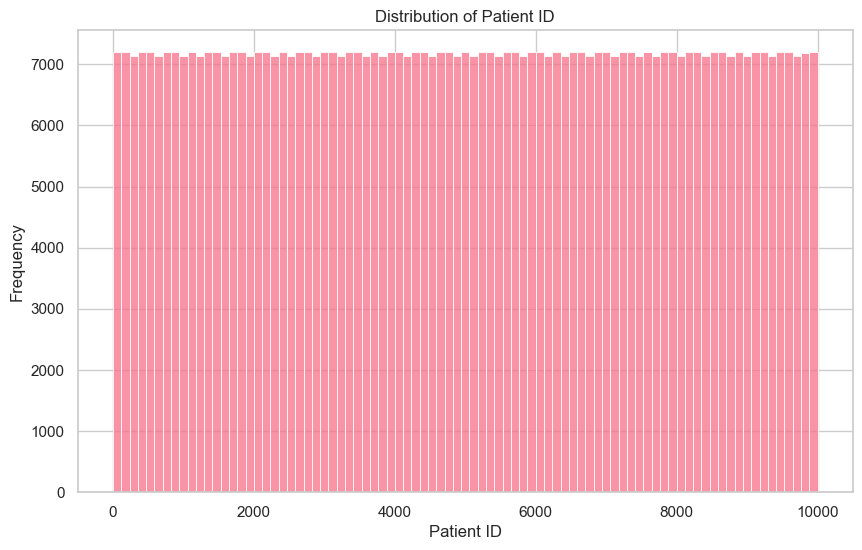

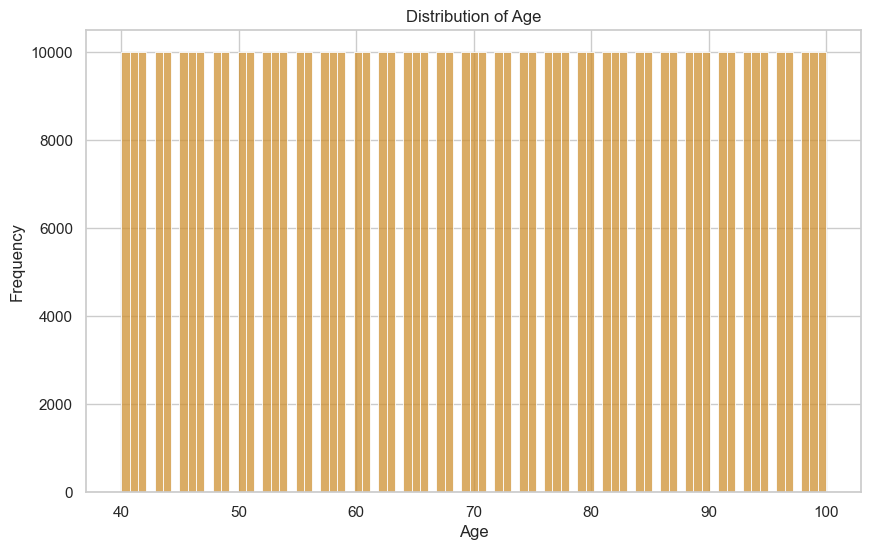

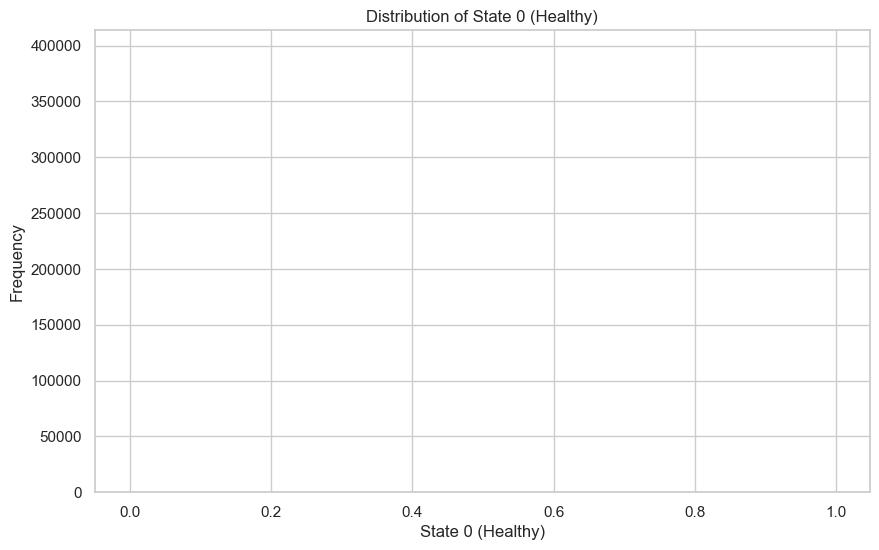

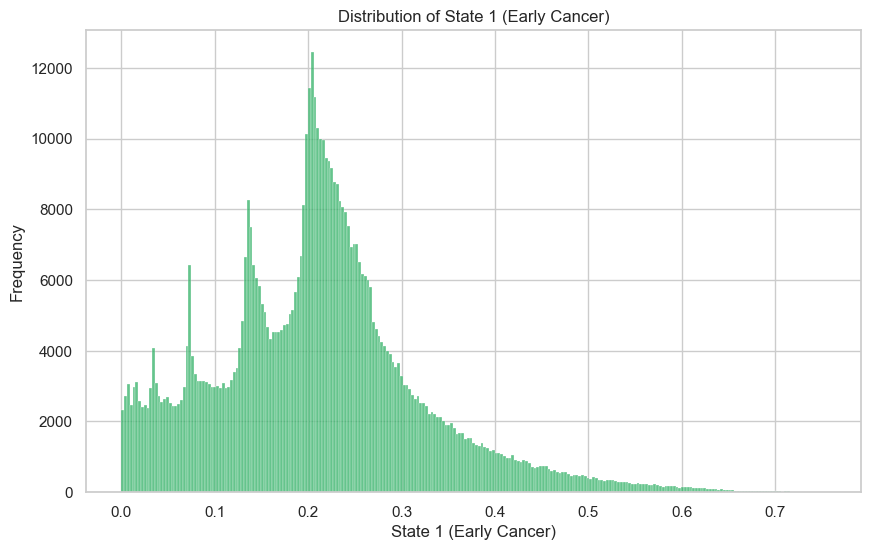

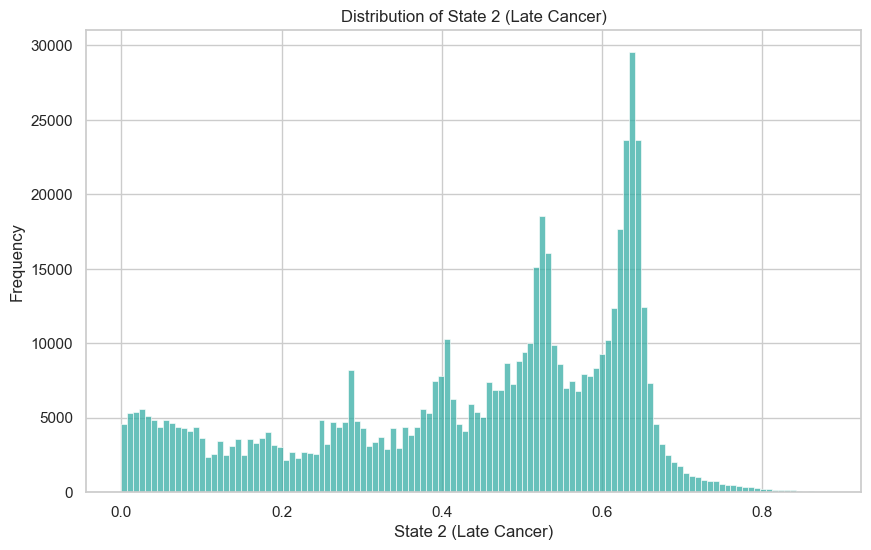

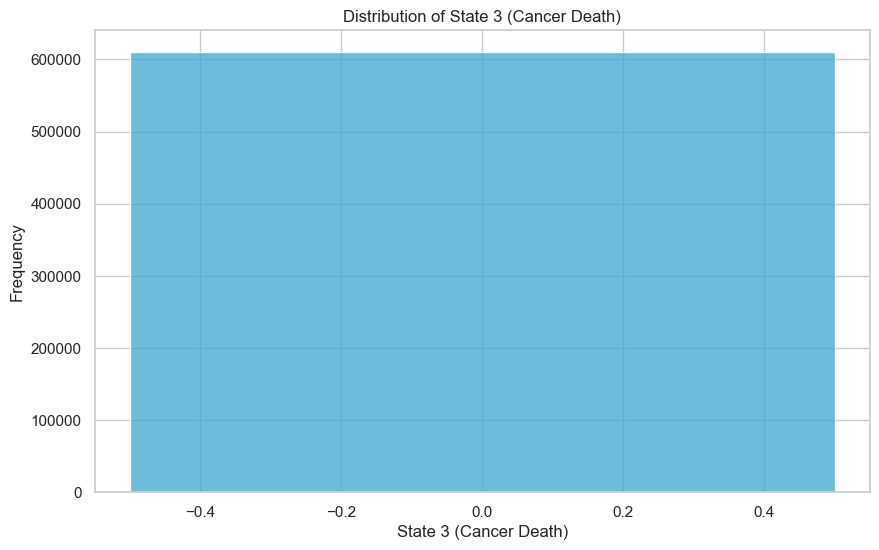

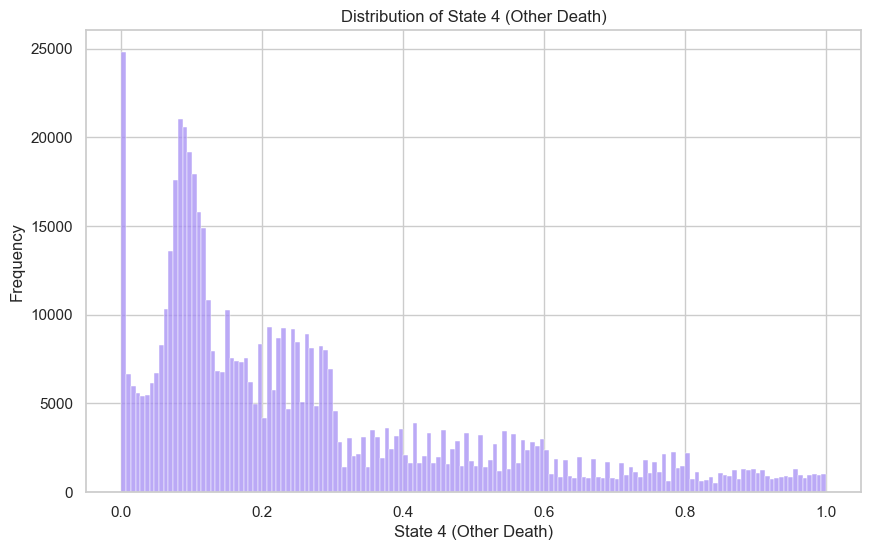

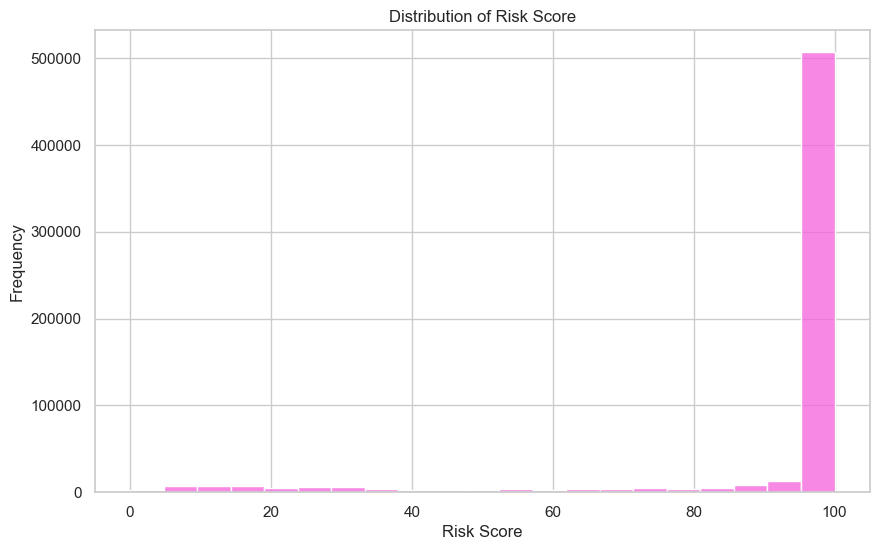

In [4]:
# Iterate through each column in the DataFrame for individual analysis

for ind, column in enumerate(all_women_data.columns):

    plt.figure(figsize = (10, 6)) # set the figure to plot all columns distribution
    
    # Check if the column is numerical or categorical

    # If numerical column
    if pd.api.types.is_numeric_dtype(all_women_data[column]):
        sns.histplot(all_women_data[column], color = colors[ind])
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
    else: # If categorical column
        sns.countplot(y = column, data = all_women_data, palette = "husl")
        plt.title(f"Count plot of {column}")
        plt.xlabel("Frequency")
        plt.ylabel(column)
    
    plt.show()

In [5]:
# Load the rewards CSV file

# set the file path
file_path = cwd_path + '/dataset/rewards.csv'
rewards_data = pd.read_csv(file_path) # read the file path

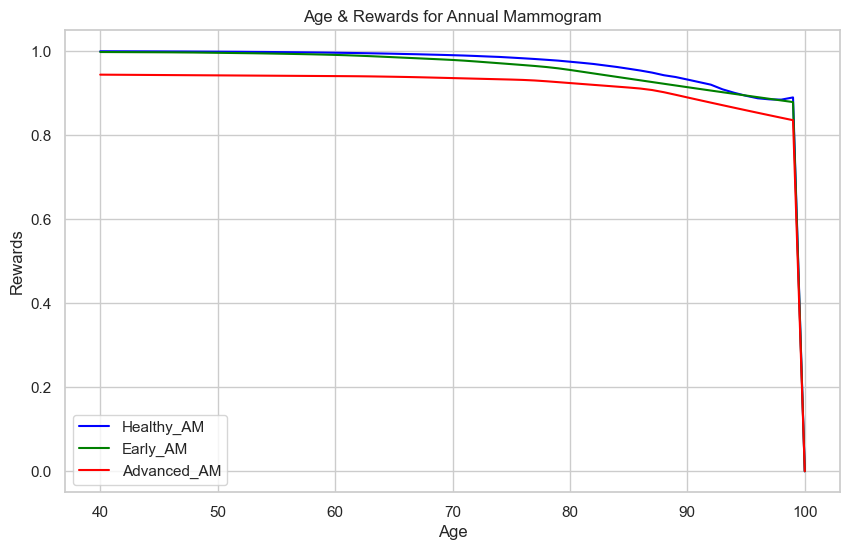

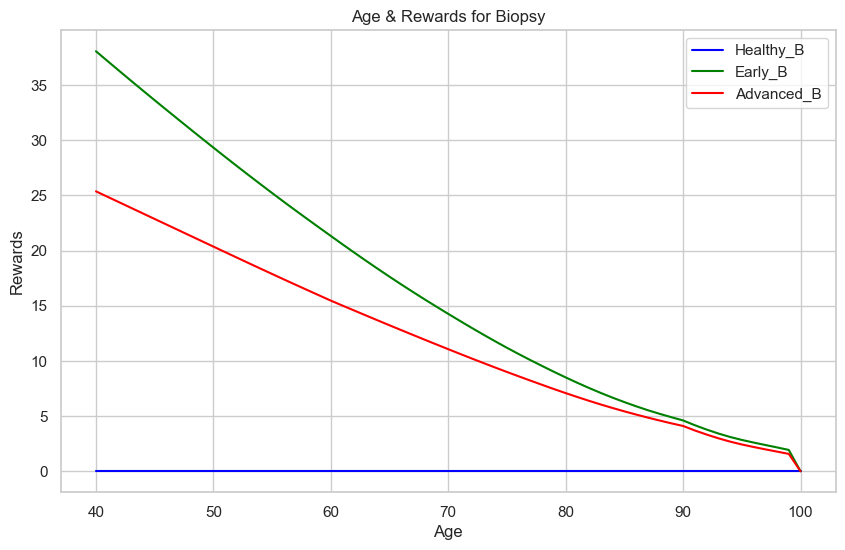

In [6]:
# sort data by 't'(age)
rewards_data = rewards_data.sort_values("t")

# Plot t(age) versus reward for Annual Mammogram action
plt.figure(figsize = (10, 6)) # set the figure size for plot
# Plot rewards for healthy state
plt.plot(rewards_data["t"], rewards_data["Healthy_AM"], label = "Healthy_AM", color = "blue")
# Plot rewards for Early stage cancer
plt.plot(rewards_data["t"], rewards_data["Early_AM"], label = "Early_AM", color = "green")
# Plot rewards for Advanced stage cancer
plt.plot(rewards_data["t"], rewards_data["Advanced_AM"], label = "Advanced_AM", color = "red")
# set labels and headers
plt.xlabel("Age")
plt.ylabel("Rewards")
plt.title("Age & Rewards for Annual Mammogram")
plt.legend()
plt.grid(True)
plt.show()

# Plot t(age) versus reward for Biopsy action
plt.figure(figsize = (10, 6)) # set the figure size for plot
# Plot rewards for healthy state
plt.plot(rewards_data["t"], rewards_data["Healthy_B"], label = "Healthy_B", color = "blue")
# Plot rewards for Early stage cancer
plt.plot(rewards_data["t"], rewards_data["Early_B"], label = "Early_B", color = "green")
# Plot rewards for Advanced stage cancer
plt.plot(rewards_data["t"], rewards_data["Advanced_b"], label = "Advanced_B", color = "red")
# set labels and headers
plt.xlabel("Age")
plt.ylabel("Rewards")
plt.title("Age & Rewards for Biopsy")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Aggregating by age to analyze age and cancer risk relation
df = all_women_data.groupby("Age").mean().reset_index()

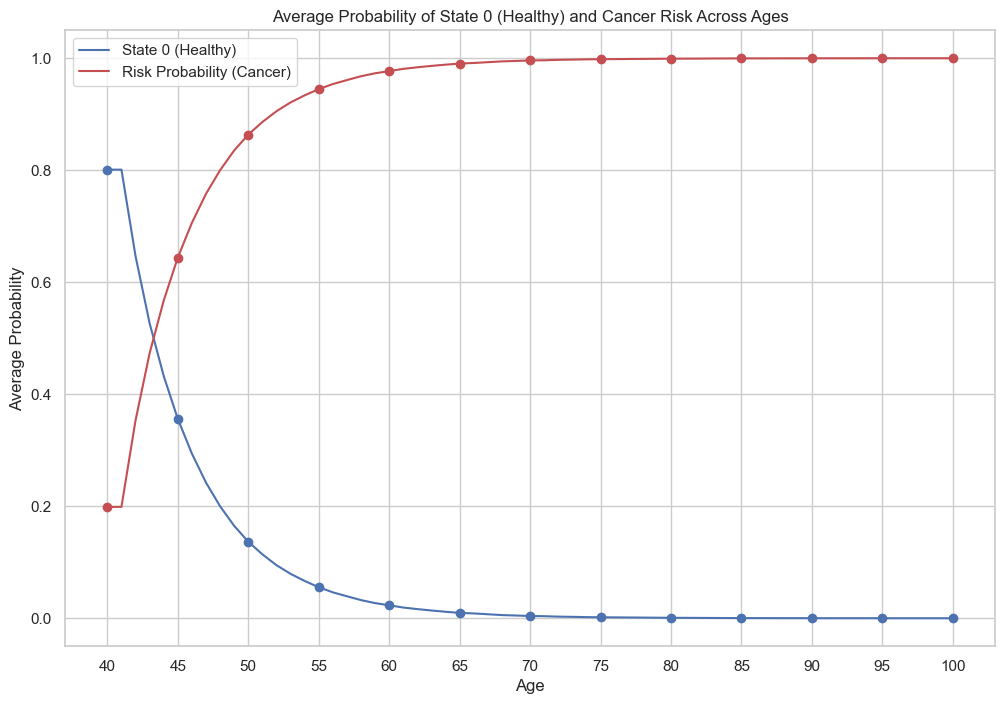

In [8]:
# Calculate mean probability at each age
age_averages = df.groupby("Age").agg({"State 0 (Healthy)": "mean", "Risk Score": "mean"}).reset_index()

# Convert Risk Score to probability
age_averages["Risk Probability"] = age_averages["Risk Score"] / 100

# Create a new column to indicate if the age is one of the intervals where we want to show dots
age_averages["Show Dot"] = age_averages["Age"].isin([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])

# Plot
plt.figure(figsize = (12, 8)) # set the size of the plot
sns.lineplot(data = age_averages, x = "Age", y = "State 0 (Healthy)", marker = "", color = "b", label = "State 0 (Healthy)")
sns.lineplot(data = age_averages, x = "Age", y = "Risk Probability", marker = "", color = "r", label = "Risk Probability (Cancer)")

# Overlay dots only at specific intervals
plt.scatter(age_averages[age_averages["Show Dot"]]["Age"], age_averages[age_averages["Show Dot"]]["State 0 (Healthy)"], color = "b")
plt.scatter(age_averages[age_averages["Show Dot"]]["Age"], age_averages[age_averages["Show Dot"]]["Risk Probability"], color = "r")

# set labels and titels
plt.title("Average Probability of State 0 (Healthy) and Cancer Risk Across Ages")
plt.xlabel("Age")
plt.ylabel("Average Probability")
plt.xticks(ticks = range(40, 101, 5))  # Set x-axis ticks at intervals of 5 years
plt.legend()
plt.show()